# Insights for investing in a cab company
---

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

### City dataset

In [2]:
# Create dataframe from City.csv dataset
city_df = pd.read_csv('..\data\City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [3]:
# Dataframe info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [4]:
# Summary statistics
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [5]:
# Convert population and users columns of city_df to integer datatype
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


### Cab dataset

In [7]:
# Create dataframe from Cab_Data.csv dataset
cab_df = pd.read_csv('..\data\Cab_Data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
# Dataframe info
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [9]:
# Summary statistics
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [10]:
# Find null values in cab_df
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Transaction datset

In [11]:
# Create dataframe from Transaction_ID.csv dataset
trans_df = pd.read_csv('..\data\Transaction_ID.csv')
trans_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [12]:
# Dataframe info
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [13]:
# Summary statistics
trans_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [14]:
# Find null values in transaction dataframe
trans_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Customer dataset

In [15]:
# Create dataframe from Transaction_ID.csv dataset
cust_df = pd.read_csv('..\data\Customer_ID.csv')
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
# Dataframe info
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
# Summary statistics
cust_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [18]:
# Find null values in transaction dataframe
cust_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

### Create dataframe from transaction and cab dataframes

In [19]:
# Create new dataframe
trans_cab_df = pd.merge(trans_df, cab_df, on=["Transaction ID"])
trans_cab_df.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [20]:
# Combined dataframe info
trans_cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Payment_Mode    359392 non-null  object 
 3   Date of Travel  359392 non-null  int64  
 4   Company         359392 non-null  object 
 5   City            359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Price Charged   359392 non-null  float64
 8   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


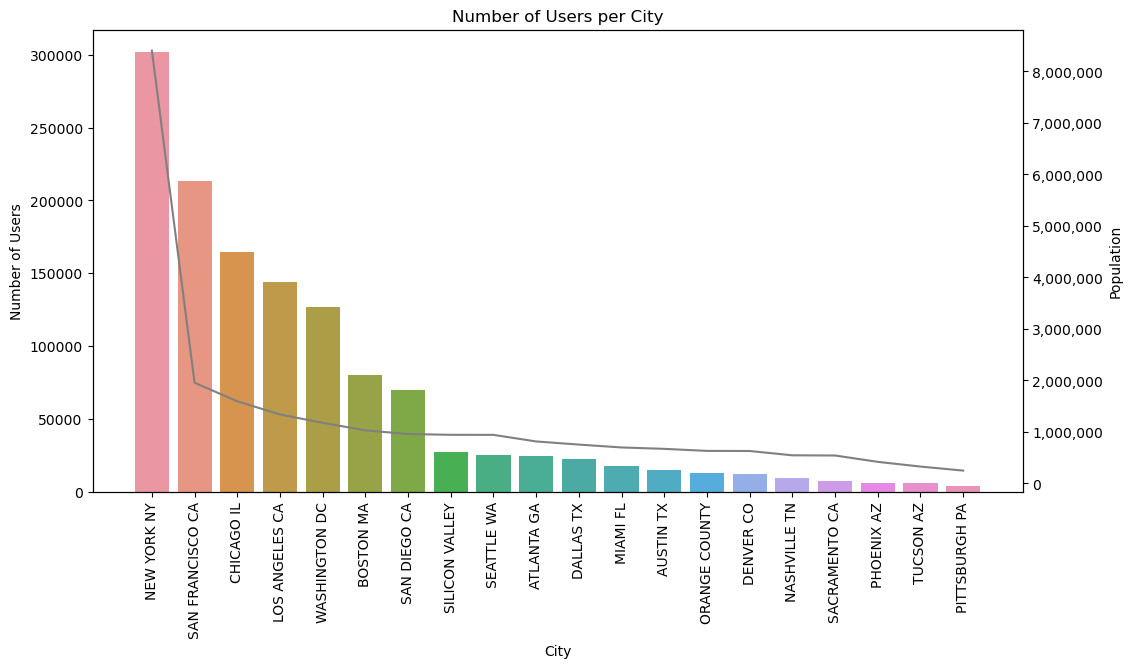

In [32]:
# Plot the number of users
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Users', data=city_df.sort_values('Users', ascending=False))
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Number of Users per City')
plt.xticks(rotation=90)

# Plot population
ax2 = plt.twinx()
sns.lineplot(x='City', y='Population', data=city_df, sort=False, color='grey', ax=ax2)
ax2.set_ylabel('Population')
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) 

plt.show()

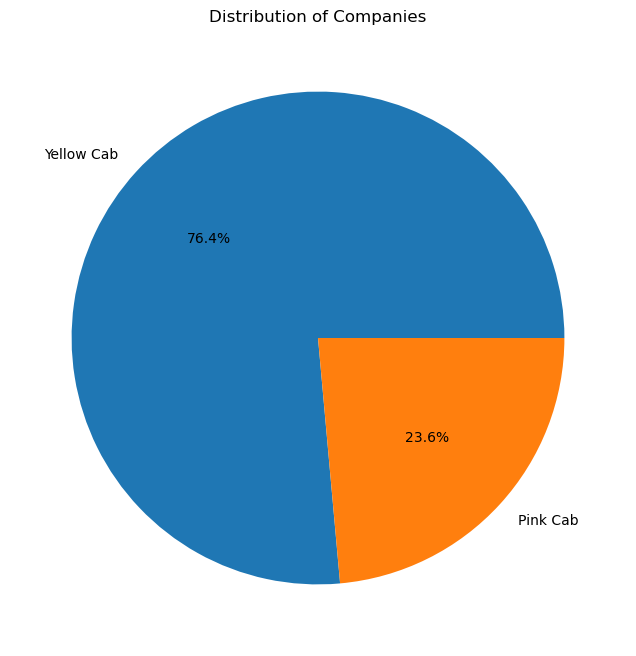

In [21]:
# Pie chart of cab company distribution
plt.figure(figsize=(8, 8))
company_counts = trans_cab_df['Company'].value_counts()
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Companies')
plt.show()

In [22]:
# Create a new column to determine profits
trans_cab_df['Profit'] = trans_cab_df['Price Charged'] - trans_cab_df['Cost of Trip']
trans_cab_df['Profit'] = trans_cab_df['Profit'].round(2)
trans_cab_df.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.32
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.67
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.57
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.80
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.84


In [23]:
# Cleanup cost of trip column
trans_cab_df['Cost of Trip'] = trans_cab_df['Cost of Trip'].round(2)
trans_cab_df.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.64,57.32
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84


### Combine trans_cab_df with customer data frame

In [24]:
combined_df = pd.merge(trans_cab_df, cust_df, on=["Customer ID"])
combined_df.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.64,57.32,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.42,281.28,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.40,194.65,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.12,253.98,Male,27,9237


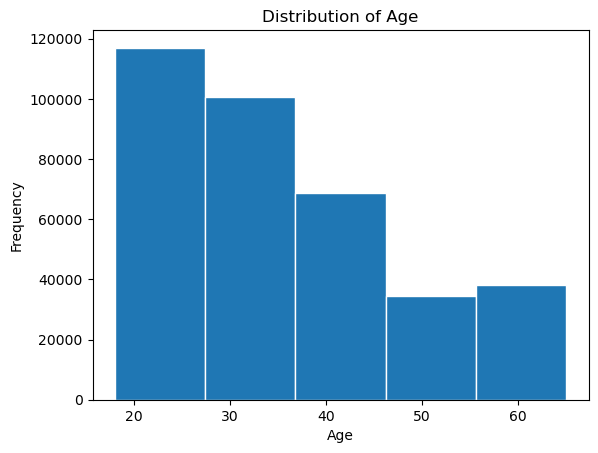

In [25]:
# Plot of the distribution of age

# Set the number of bins for the histogram
num_bins = 5

# Create the histogram
plt.hist(combined_df['Age'], bins=num_bins, edgecolor='white')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Display the histogram
plt.show()

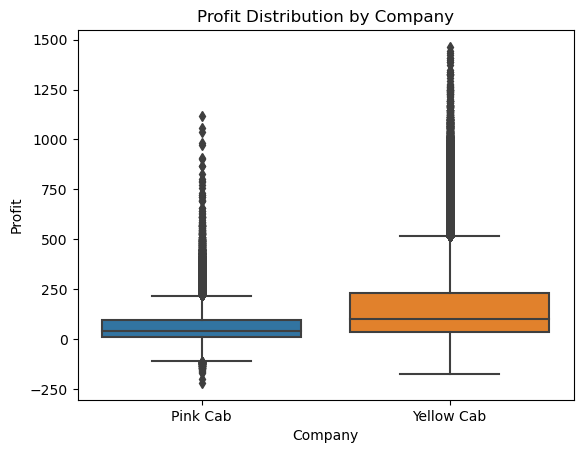

In [26]:
# Box plot of company profits
sns.boxplot(data=combined_df, x='Company', y='Profit')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.title('Profit Distribution by Company')
plt.show()

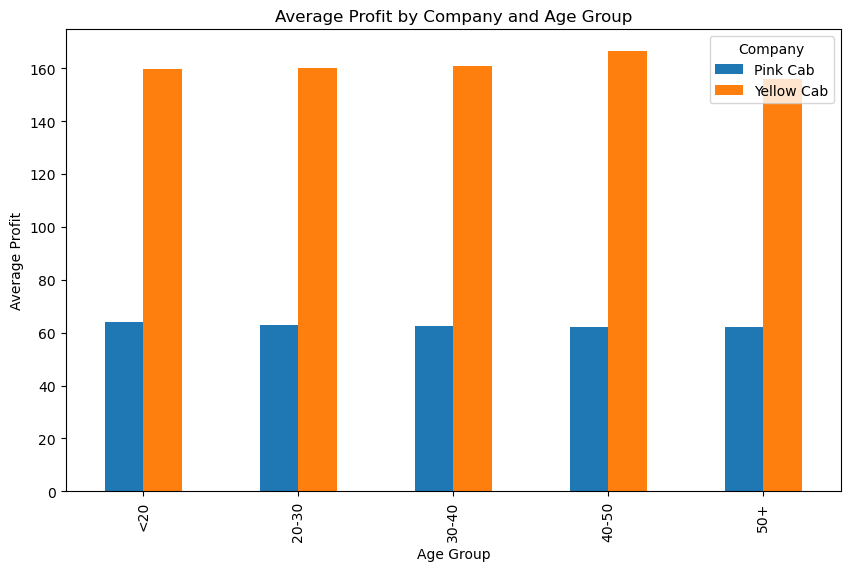

In [27]:
# Graph company profits by age group

# Define the age group bins
age_bins = [0, 20, 30, 40, 50, np.inf]
age_labels = ['<20', '20-30', '30-40', '40-50', '50+']

# Group the data by age group and company, and calculate the average profit
grouped_df = combined_df.groupby([pd.cut(combined_df['Age'], bins=age_bins, labels=age_labels), 'Company'])['Profit'].mean().unstack()

# Plot the bar graph
grouped_df.plot(kind='bar', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Profit')
plt.title('Average Profit by Company and Age Group')

# Display the graph
plt.show()

In [28]:
pink_cab_km_sum = sum(combined_df[combined_df['Company'] == 'Pink Cab']['KM Travelled'])
yellow_cab_km_sum = sum(combined_df[combined_df['Company'] == 'Yellow Cab']['KM Travelled'])

print(f"Total KM Travelled by Pink Cab: {pink_cab_km_sum}")
print(f"Total KM Travelled by Yellow Cab: {yellow_cab_km_sum}")

Total KM Travelled by Pink Cab: 1911073.1099999864
Total KM Travelled by Yellow Cab: 6199417.46999995


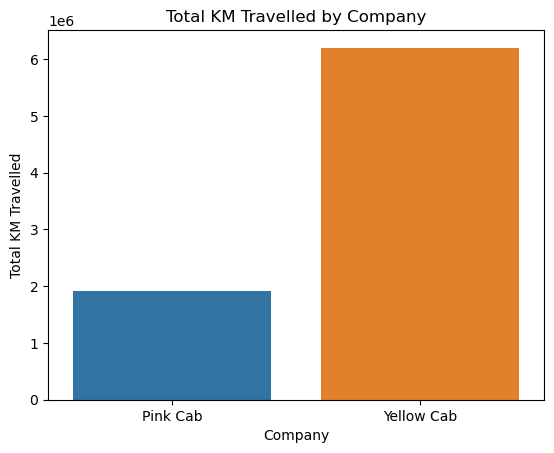

In [29]:
# Bar chart of total KM travelled by each company

sns.barplot(x=['Pink Cab', 'Yellow Cab'], y=[pink_cab_km_sum, yellow_cab_km_sum])
plt.xlabel('Company')
plt.ylabel('Total KM Travelled')
plt.title('Total KM Travelled by Company')
plt.show()

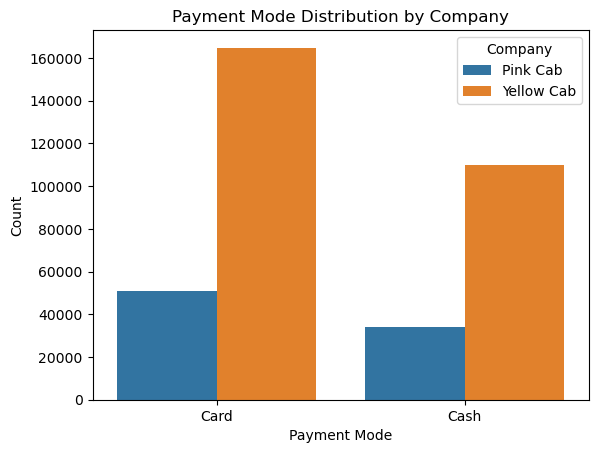

In [30]:
# Payment methods distribution by company
sns.countplot(data=combined_df, x='Payment_Mode', hue='Company')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Payment Mode Distribution by Company')
plt.show()

Text(0.5, 1.0, 'Profit per KM travelled')

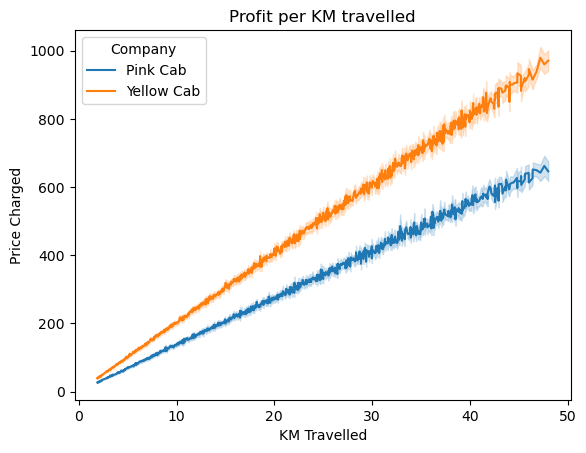

In [35]:
# Profit per distance travelled 

sns.lineplot(x='KM Travelled', y='Price Charged', hue='Company', data=combined_df)
plt.title("Profit per KM travelled")